#### Importar as Bibliotecas Necessárias

Esta célula importa as bibliotecas essenciais para a análise de dados (pandas e numpy) e para a clusterização (KMeans do sklearn).

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_excel('input/historico_vendas.xlsx')
df.head()

,Produto_ID,volume_vendas,valor_monetario,frequencia_vendas,vendas_mes_1,vendas_mes_2,vendas_mes_3
0,P001,6241,86447.24,997,959,1150,4132
1,P002,10330,62706.51,962,4548,1931,3851
2,P003,7519,33758.90,482,3067,1012,3440
3,P004,6245,7292.28,955,815,1664,3766
4,P005,8161,31787.25,160,4754,1081,2326


#### Análise ABC com Machine Learning

A análise ABC classifica os produtos em três categorias com base na importância relativa:

- Classe A: Produtos de alta importância
- Classe B: Produtos de importância moderada
- Classe C: Produtos de baixa importância

Multivariada: O K-means pode considerar múltiplas variáveis simultaneamente (volume, valor, frequência), proporcionando uma visão mais holística do que apenas o valor do produto, nesse exemplo é usado volume de vendas, valor monetário e frequência de venda.

In [42]:
# Selecionar as colunas relevantes para análise ABC
features = df[['volume_vendas', 'valor_monetario', 'frequencia_vendas']]

# Normalizar os dados
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicar K-means
kmeans = KMeans(n_clusters=3, random_state=0)
df['ABC_Class'] = kmeans.fit_predict(features_scaled)

# Mapear as classes para A, B e C
df['ABC_Class'] = df['ABC_Class'].map({0: 'A', 1: 'B', 2: 'C'})

#### Análise XYZ

A análise XYZ classifica os produtos com base na variabilidade da demanda:

- Classe X: Demanda estável
- Classe Y: Demanda moderadamente variável
- Classe Z: Demanda altamente variável

Utilizando a técnica de análise de séries temporais e a aplicação de modelos de clustering, podemos automatizar essa classificação.

In [52]:
def coef_var(row):
    return np.std(row) / np.mean(row)

# Aplicar a função ao dataframe para calcular o coeficiente de variação das vendas
df['coef_var'] = df[['vendas_mes_1', 'vendas_mes_2', 'vendas_mes_3']].apply(coef_var, axis=1)

# Classificar com base no coeficiente de variação
conditions = [
    (df['coef_var'] < 0.1),
    (df['coef_var'] >= 0.1) & (df['coef_var'] <= 0.25),
    (df['coef_var'] > 0.25)
]

values = ['X', 'Y', 'Z']

# Definindo o valor padrão como string
default_value = 'Z'

# Aplicando o np.select
df['XYZ_Class'] = np.select(conditions, values, default=default_value)

#### Integração das Análises ABC e XYZ

Combinar os resultados das análises ABC e XYZ para segmentar os produtos de maneira mais detalhada.

In [53]:
df['ABC_XYZ_Class'] = df['ABC_Class'] + df['XYZ_Class']

df.to_excel('output/ABC_XYZ.xlsx')

#### Visualização e Análise

Visualize os resultados para entender melhor a segmentação e para comunicar as descobertas de maneira eficaz.

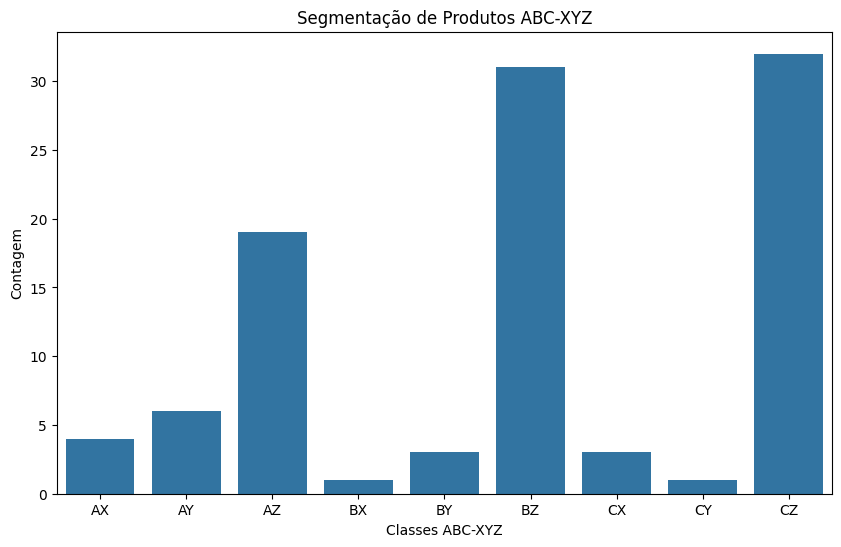

In [56]:
# Ordenar as classes em ordem alfabética
sorted_classes = sorted(df['ABC_XYZ_Class'].unique())

# Criar o gráfico de contagem com as classes ordenadas
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ABC_XYZ_Class', order=sorted_classes)
plt.title('Segmentação de Produtos ABC-XYZ')
plt.xlabel('Classes ABC-XYZ')
plt.ylabel('Contagem')
plt.show()

**Detalhamento das Combinações ABC-XYZ**

A segmentação ABC-XYZ resulta em nove combinações possíveis, cada uma com características distintas em termos de valor e variabilidade da demanda. Aqui está um detalhamento das estratégias sugeridas para cada combinação:

1. **Produtos AX**
Características: Alto valor (A) e demanda estável (X).

**Estratégias:**\
Manter um alto nível de estoque para garantir disponibilidade, já que esses produtos são críticos e a demanda é previsível.

2. **Produtos AY**
Características: Alto valor (A) e demanda moderadamente variável (Y).

**Estratégias:**\
Manter um estoque moderado e revisar periodicamente os níveis de estoque para ajustar às variações de demanda.

3. **Produtos AZ**
Características: Alto valor (A) e demanda altamente variável (Z).

**Estratégias:**\
Manter estoque de segurança alto e usar previsões de demanda avançadas para ajustar os níveis de estoque.

4. **Produtos BX**
Características: Valor médio (B) e demanda estável (X).

**Estratégias:**\
Manter um nível de estoque consistente, suficiente para atender a demanda sem excessos.

5. **Produtos BY**
Características: Valor médio (B) e demanda moderadamente variável (Y).

**Estratégias:**\
Monitorar e ajustar os níveis de estoque conforme a variação de demanda.

6. **Produtos BZ**
Características: Valor médio (B) e demanda altamente variável (Z).

**Estratégias:**\
Manter um nível de estoque de segurança moderado e ajustar frequentemente baseado em previsões.

7. **Produtos CX**
Características: Baixo valor (C) e demanda estável (X).

**Estratégias:**\
Manter um nível de estoque baixo, mas suficiente para evitar rupturas.

8. **Produtos CY**
Características: Baixo valor (C) e demanda moderadamente variável (Y).

**Estratégias:**\
Monitorar regularmente e ajustar os níveis de estoque para evitar excessos.

9. **Produtos CZ**
Características: Baixo valor (C) e demanda altamente variável (Z).

**Estratégias:**\
Manter o estoque mínimo e considerar a descontinuação de produtos com baixa performance.